# What is Web Scraping


Web scraping is extracting useful data from the internet. Of course, users are able and allowed to copy and paste the data by themselves however it will be not feasible to do it for large websites with hundreds of pages.

This is where web scraping comes into play.

Web Scraping is a method of extracting unstructured data from HTML format from the website and transform it into useful and meaningful data for more in-depth analysis and making different business decisions.

### Advantages of using Web Scraping

Marketing research

 - Gather all the data that the user needed and transfer into meaningful data, thus users can make predictions based on the data
 
 
   -  For example which video game is the most popular in 2019
   
More Accuracy and Live Data

- It extracts live data from the website as long as the website keeps updating

Competitive

- User can also easily extract competitor products price on the official automatically, thus to think of different market strategies to contend the competition


### Beautiful Soup

'BeautifulSoup', a powerful library for Python that enables us to automate information retrieval from a web page

Before using beautifulsoup, remember to install all the required libraries

This is the link more information on beautifulsoup functions:

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In this jupyter workbook, will mainly use soup.find and soup.findAll

####  Soup.find:

soup.find('p') ;  Return the text in between first pair of tags e.g. text between the first P

####  Soup.findAll:

soup.find_all('p') Return the text in between every pair of tags e.g. text between all the P


### HTML

Since its webscraping, we’re interested in the main content of the web page, so we look at the HTML.
A simple HTML document example:

#<html>
#<head>
#<title>Page Title</title>
#</head>
#<body><h1>My First Heading</h1>
#<p>My first paragraph.</p>

#</body>
#</html>

In [1]:
from bs4 import BeautifulSoup

If we wanted to run BeatifulSoup on an actual web page, we could simply call the 'requests' library to load down the raw text of that page. Here we specify a basic method for pulling down HTML from a real web page, by specifying its URL:

In [2]:
import urllib.request

def get_HTML(url):
    response = urllib.request.urlopen(url)
    html = response.read()
    return html

#### Find the Largest city in Australia from the box on the right

<b>For this code,

We need to use the inspect element to see which element we need to extract. Right Click anywhere on the website and click inspect element

</b>
<img src="files/inspectelement.png" style="width: 800px;">

<b>This code is finding the text largest city and findnext a element and print it out which is sydney</b>

<img src="files/sydneywikiexample.png" style="width: 800px;">

<b>Defining the html

In [3]:
Australia_Wiki_HTML = get_HTML('https://en.wikipedia.org/wiki/Australia')

<b>Find the element that contains text Largest City and find the next element('a') and extract its information.

</n>Beacuse we are using findnext, so it will only extract the information from the next 'a' element but not from all 'a' element
    

In [4]:
def get_the_capital(HTML):
    soup = BeautifulSoup(HTML, "lxml")
    th_element = soup.find(text="Largest city")
    target_element = th_element.findNext('a')
    print(target_element)

get_the_capital(Australia_Wiki_HTML)

<a href="/wiki/Sydney" title="Sydney">Sydney</a>


## Quick Example Umbrella Company in Australia - Marketing decisions (Webscraping+CSV)

So in this exercise, we will be combining information from the website, excel CSV files and creating useful readable information to make marketing decisions.

###  Where to launch 
#### Web-scraping ( Australia Government BoM ), Visualization (Bar chart)

Since Australia is a big country with many cities, it is hard for a company to produce that much of quantities and sell it across Australia. If the company does, it will lead to a serious increase in production cost and dead inventories, thus to affect the plan of the company its development speed. By knowing which cities had the most precipitation annually, the company can focus on launching a new umbrella to the specific country, to prevent deadlocks and over-budgeted production cost.

In [ ]:
#Please install in the terminal
pip install bs4

In [3]:
from bs4 import BeautifulSoup

In [4]:
#import library
import urllib.request

#define get html source coding
def get_HTML(url):
    response = urllib.request.urlopen(url)
    html = response.read()
    return html

#### The code below extracts the city's name and its annual rainfall

Find the text 'seasonal' and find the table after text 'seasonal'

<b>Table After Seasonal</b>
<img src="files/rainfalltable.png" style="width: 800px;">

As you can see the table is huge and we only want to extract the annual rainfall and the name of a city, so we need to extract the 'td'element in all'tr'element within the seasonal table, because we are finding the 'td' in 'tr', so there will be some useless data so we need to do a filter at the end.


<b>Results Without Filtering</b>
<img src="files/uselessdatacityname.png" style="width: 800px;">

<b>Inspect The Element</b>
<img src="files/cityelement.png" style="width: 800px;">

Below code will be extracting the city name:




In [5]:
#taking out useful eliminate from a website by using inspect elements
cities_in_australia = []

#taking out selected cities from different elements
#link data is extracted from Australia Bureau of Statistics from government
#Cities is mainly focus on famous cities in Australia
states_bom_HTML = get_HTML("http://www.abs.gov.au/ausstats/abs@.nsf/Lookup/by%20Subject/1301.0~2012~Main%20Features~Australia's%20climate~143")
soup = BeautifulSoup(states_bom_HTML, "lxml")
span_element = soup.find(text="Seasonal")
h3_element = span_element.parent
table_element = h3_element.findNext('table')
for tr_element in table_element.findAll('tr'):
    td_element = tr_element.find('td')
    if td_element != None:
        cities_in_australia.append(td_element.text)

# eliminate useless data and print out selected cities
cities_in_australia = cities_in_australia[27:36]
cities_in_australia

['Sydney',
 'Melbourne',
 'Brisbane',
 'Adelaide',
 'Perth',
 'Hobart',
 'Darwin',
 'Canberra',
 'Alice Springs']

#### The code below is doing the same thing as extract the name of a city

however this time it is extracting div element in 'td'elements and does filtering



<b>Inspect The Element</b>
<img src="files/rainfallelement.png" style="width: 800px;">

<b>Results Without Filtering</b>
<img src="files/rainfallmms.png" style="width: 100px;">

Output results more than 250 records


In [6]:
#taking out useful eliminate from a website by using inspect elements
a_rainfall = []

#taking out selected cities from different elements
#link data is extracted from Australia Bureau of Statistics from government
#Cities is mainly focus on famous cities in Australia
states_bom_HTML = get_HTML("http://www.abs.gov.au/ausstats/abs@.nsf/Lookup/by%20Subject/1301.0~2012~Main%20Features~Australia's%20climate~143")
soup = BeautifulSoup(states_bom_HTML, "lxml")
span_element = soup.find(text="Seasonal")
h3_element = span_element.parent
table_element = h3_element.findNext('table')
for td_element in table_element.findAll('td'):
    div_element = td_element.find('div'[-0:])
    if div_element != None:
        a_rainfall.append(div_element.text)
        
# eliminate useless data and spaces between the data because there are more than 500 data inside the list
# print out selected data for sepcific cities for the above cities
# removing all the spacing between a thousand and hunderd place in order to change from str to float afterwards
a_rainfall = a_rainfall[263].replace(" ", ""),a_rainfall[276].replace(" ", ""),a_rainfall[289].replace(" ", ""),a_rainfall[302].replace(" ", ""),a_rainfall[315].replace(" ", ""),a_rainfall[328].replace(" ", ""),a_rainfall[341].replace(" ", ""),a_rainfall[354].replace(" ", ""),a_rainfall[367].replace(" ", "")
a_rainfall

('1276.5',
 '654.4',
 '1194.0',
 '563.0',
 '745.3',
 '576.4',
 '1847.1',
 '630.0',
 '325.6')

<b>Combining two sets of data and make it as readable information

This part is combining the data extract from the above and transfer it into readable information and set up a new list to output for chart afterward

In [7]:
# combine the data from the above and combine it into useful readable data
# cities + annual avergae rainfall in australia

for i in range(0, len(cities_in_australia)):
    print("Cities: "+cities_in_australia[i])
    print("Annual avergae rainfall(mm): "+ a_rainfall[i])
    print('\n')

#set up a new list to store the data for chart
cities = cities_in_australia
rainfall_mm = a_rainfall

Cities: Sydney
Annual avergae rainfall(mm): 1276.5


Cities: Melbourne
Annual avergae rainfall(mm): 654.4


Cities: Brisbane
Annual avergae rainfall(mm): 1194.0


Cities: Adelaide
Annual avergae rainfall(mm): 563.0


Cities: Perth
Annual avergae rainfall(mm): 745.3


Cities: Hobart
Annual avergae rainfall(mm): 576.4


Cities: Darwin
Annual avergae rainfall(mm): 1847.1


Cities: Canberra
Annual avergae rainfall(mm): 630.0


Cities: Alice Springs
Annual avergae rainfall(mm): 325.6




#### Visualization with bar chart(readable information)

Getting data from the list from the previous step and output it as a chart

Text(0.5, 1.0, 'Average annual rainfall')

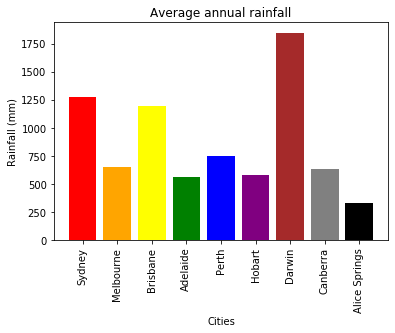

In [9]:
#Import the plotting library
import matplotlib.pyplot as plt
import numpy as np

#a for loop in order to turn all the str from the list into float and make sure its recognizable for plt
rainfall_new = []
for rain in rainfall_mm:
    rainfall_new.append(float(rain))

#Setup the data with different colors and names
y = [rainfall_new[0],rainfall_new[1], rainfall_new[2],rainfall_new[3],rainfall_new[4],rainfall_new[5],rainfall_new[6],rainfall_new[7],rainfall_new[8]]
x = [cities[0],cities[1], cities[2],cities[3],cities[4], cities[5],cities[6],cities[7],cities[8]]
colours = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'grey', 'black', 'cyan']

#Plot the data and rotate the x axis name by 90 degrees
plt.bar(x,y, color=colours)
plt.xticks(rotation=90)

#Lable the chart
plt.ylabel('Rainfall (mm)')
plt.xlabel('Cities')
plt.title('Average annual rainfall')

As a result, Darwin had the most precipitation throughout a year, followed by Sydney and Brisbane. The company can first start launching the new umbrella in Darwin, after having a sales report on the new umbrella that sells in Darwin, the business team can analysis is the product earning much while comparing to the company's expectation, is it worth to sell in other cities in order to increase the sales volume and increase company's populations. If the sales volume is not as good as the expectation, the company might need to improve the product or even stop launching it because it is not profitable. If the sales volume reaches the company's expectation, the company can start expanding its product by selling it to Sydney and Brisbane to maximize the sales volume while minimizing the chance of having deadstock.


## When to launch
### Reading and Writing files( Loading data from CSV from BoM ), Visualization ( Tabular, Line chart )

After knowing where to launch the new umbrella, it is important to know when to launch the product too because of the first idea and purpose of the umbrella is to prevent and protect consumers getting wet from raining, if the company launches the umbrella at a wrong time, for example, launch it when its the lowest precipitation of Darwin, of course, the sales volume will be low because no one needs it thus to increase deadstock and affect the production line on producing on other products. So analyzing the precipitation annually allows the company to launch the umbrella at the right time, maximizing the sales and minimizing the lost.

#### Import data CSV which downloaded from BoM and transfer it into readable table

In the folder, there are three excel CSV files. In this part, we are going to extract all the data and store it into a list. Because there is too much data in each excel file so we are going to use 2017 for Sydney, Darwin, and Brisbane thus filtering data is needed.

Repeat the steps three times for Sydney, Darwin, and Brisbane.

##### Darwin

In [11]:
# Import pandas for dataframes and matplotlib for plotting
import matplotlib.pyplot as plt
import pandas

# Set variables for file and index column
darwin_file = 'darwin_raindata_set.csv' #import csv dataset for darwin from BoM
darwin_colname = ('Product code','Station Number','Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Annual') 

# Read the dataset and show in detailed years, mothns and mm rainfall per month
darwin_data = pandas.read_csv(darwin_file, index_col= darwin_colname)
darwin_data

Empty DataFrame
Columns: []
Index: [(IDCJAC0001, 14050, 2002, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 138.1, nan), (IDCJAC0001, 14050, 2003, 497.1, nan, 162.6, 1.5, 0.0, 0.0, 0.0, 0.0, 14.0, 57.6, 163.5, 316.8, nan), (IDCJAC0001, 14050, 2004, 334.2, nan, 442.2, 15.3, 76.6, 38.0, 0.0, 0.0, 0.0, 36.1, 46.8, 313.6, nan), (IDCJAC0001, 14050, 2005, 258.7, 205.7, 169.4, 65.8, 0.0, 0.0, 0.0, 0.0, 23.0, 16.0, 93.4, 187.0, 1019.0), (IDCJAC0001, 14050, 2006, 383.5, 149.5, 560.0, nan, 14.0, 0.0, 0.0, 0.0, 6.0, nan, 13.0, 309.0, nan), (IDCJAC0001, 14050, 2007, 370.5, 368.0, 571.0, nan, 24.5, 0.5, nan, nan, 53.0, 46.0, 132.5, 239.5, nan), (IDCJAC0001, 14050, 2008, 419.7, nan, 249.5, 20.0, nan, nan, nan, nan, nan, nan, nan, nan, nan), (IDCJAC0001, 14050, 2010, nan, nan, nan, 36.7, 49.6, nan, nan, nan, nan, nan, nan, nan, nan), (IDCJAC0001, 14050, 2011, 625.3, 1029.3, 147.4, 160.8, nan, nan, nan, 0.2, 4.0, 70.0, 100.6, 116.4, nan), (IDCJAC0001, 14050, 2012, 579.0, 82.8, 168.4, 64.4, 48.0, nan, nan, nan, nan, nan, 0.0, 49.0, nan), (IDCJAC0001, 14050, 2013, nan, 39.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 207.0, nan), (IDCJAC0001, 14050, 2014, 668.0, 339.0, 86.0, 72.5, 11.6, nan, nan, nan, nan, 10.0, 233.0, 152.0, nan), (IDCJAC0001, 14050, 2015, 525.0, 372.7, 206.0, 41.0, 0.0, 4.0, 0.0, 0.0, 30.5, 61.0, 42.6, 596.0, 1878.8), (IDCJAC0001, 14050, 2016, 181.9, 167.1, 178.2, 28.3, 72.0, 0.0, 0.0, 0.0, 56.0, 42.0, 162.0, 516.2, 1403.7), (IDCJAC0001, 14050, 2017, 476.9, 679.4, 376.5, 156.6, 0.0, 0.0, 0.0, 0.0, 0.0, 53.4, 214.4, 162.0, 2119.2), (IDCJAC0001, 14050, 2018, 895.5, 301.0, 234.5, 15.4, nan, nan, nan, nan, nan, nan, nan, nan, nan)]

##### Darwin precipitations from Jan to Dec 2017

In [12]:
#rainfall data for darwin in 2017 from January to December in ascending order
#eliminate useless comlums and rows

darwin_data_cln = darwin_data.index.values[14]
darwin_data_cln = darwin_data_cln[3:15] 
darwin_data_cln

(476.9, 679.4, 376.5, 156.6, 0.0, 0.0, 0.0, 0.0, 0.0, 53.4, 214.4, 162.0)

##### Sydney

In [13]:
# Import pandas for dataframes and matplotlib for plotting
import matplotlib.pyplot as plt
import pandas

# Set variables for file and index column
sydney_file = 'sydney_raindata_set.csv' #import csv dataset for sydney from BoM
sydney_colname = ('Product code','Station Number','Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Annual') 

# Read the dataset and show in detailed years, mothns and mm rainfall per month
sydney_data = pandas.read_csv(sydney_file, index_col= sydney_colname)
sydney_data

Empty DataFrame
Columns: []
Index: [(IDCJAC0001, 66006, 1885, 87.0, 29.0, 52.1, 36.1, 4.1, 414.5, 191.0, 0.0, 11.4, 6.6, 12.4, 94.9, 939.1), (IDCJAC0001, 66006, 1886, 66.1, 12.7, 127.4, 84.2, 60.2, 39.0, 137.1, 49.9, 6.6, 101.1, 107.0, 78.8, 870.1), (IDCJAC0001, 66006, 1887, 153.8, 114.8, 65.9, 207.2, 261.0, 140.4, 90.2, 183.3, 33.3, 9.1, 128.4, 139.4, 1526.8), (IDCJAC0001, 66006, 1888, 0.0, 74.6, 2.5, 0.5, 11.0, 41.5, 72.9, 51.1, 64.4, 26.1, 8.6, 199.1, 552.3), (IDCJAC0001, 66006, 1889, 43.3, 57.1, 24.2, 86.8, 521.9, 28.3, 238.4, 113.4, 99.8, 15.0, 130.7, 54.7, 1413.6), (IDCJAC0001, 66006, 1890, 139.3, 468.3, 424.7, 71.8, 216.7, 288.3, 229.7, 37.6, 63.5, 45.4, 120.7, 62.0, 2168.0), (IDCJAC0001, 66006, 1891, 102.7, 69.5, 251.0, 143.4, 91.5, 426.0, 107.7, 92.5, 165.8, 48.1, 85.2, 23.6, 1607.0), (IDCJAC0001, 66006, 1892, 136.9, 116.1, 481.9, 98.6, 81.2, 55.3, 110.0, 133.6, 181.1, 132.3, 72.0, 165.8, 1764.8), (IDCJAC0001, 66006, 1893, 95.1, 81.6, 275.5, 190.8, 43.9, 198.8, 135.6, 76.1, 39.6, 119.2, 115.4, 44.6, 1416.2), (IDCJAC0001, 66006, 1894, 40.3, 180.8, 340.7, 100.3, 32.8, 41.7, 57.0, 39.9, 176.2, 69.8, 10.4, 99.6, 1189.5), (IDCJAC0001, 66006, 1895, 220.6, 204.7, 37.8, 76.1, 66.8, 31.4, 10.7, 15.1, 110.2, 24.6, 76.3, 86.4, 960.7), (IDCJAC0001, 66006, 1896, 42.9, 120.9, 102.4, 3.3, 99.6, 269.0, 51.3, 39.9, 7.9, 50.8, 136.4, 43.2, 967.6), (IDCJAC0001, 66006, 1897, 32.3, 8.9, 98.0, 163.8, 87.6, 205.7, 157.2, 115.8, 30.7, 30.7, 4.1, 135.4, 1070.2), (IDCJAC0001, 66006, 1898, 139.7, 116.3, 41.4, 12.4, 313.4, 167.9, 74.7, 130.8, 30.5, 97.5, 11.9, 26.4, 1162.9), (IDCJAC0001, 66006, 1899, 52.8, 30.7, 73.7, 86.1, 162.1, 287.5, 102.6, 373.9, 0.0, 90.2, 131.1, 20.3, 1411.0), (IDCJAC0001, 66006, 1900, 43.7, 39.1, 109.2, 151.9, 319.0, 282.7, 326.9, 12.4, 64.8, 2.5, 187.7, 44.5, 1584.4), (IDCJAC0001, 66006, 1901, 161.5, 37.8, 83.6, 356.6, 46.5, 23.6, 101.3, 109.5, 73.7, 45.7, 17.3, 8.6, 1065.7), (IDCJAC0001, 66006, 1902, 58.4, 7.6, 52.6, 64.3, 34.0, 22.9, 284.5, 163.6, 49.8, 268.7, 72.6, 63.5, 1142.5), (IDCJAC0001, 66006, 1903, 49.0, 26.2, 93.2, 45.5, 80.5, 47.5, 120.4, 143.0, 126.7, 94.7, 61.0, 101.6, 989.3), (IDCJAC0001, 66006, 1904, 48.8, 98.6, 132.3, 332.5, 146.3, 4.6, 274.8, 37.3, 27.4, 62.7, 12.4, 21.3, 1199.0), (IDCJAC0001, 66006, 1905, 43.2, 52.3, 204.0, 141.2, 143.3, 58.2, 11.4, 17.8, 69.3, 64.0, 9.9, 42.9, 857.5), (IDCJAC0001, 66006, 1906, 58.4, 9.7, 99.3, 23.9, 213.6, 54.9, 5.6, 131.6, 33.0, 48.0, 109.5, 33.8, 821.3), (IDCJAC0001, 66006, 1907, 66.0, 63.0, 203.7, 35.1, 38.6, 254.5, 11.2, 7.6, 7.1, 14.5, 52.3, 45.2, 798.8), (IDCJAC0001, 66006, 1908, 43.9, 182.1, 70.4, 73.4, 67.1, 25.4, 290.1, 243.8, 75.4, 38.1, 16.5, 31.8, 1158.0), (IDCJAC0001, 66006, 1909, 32.5, 202.7, 34.8, 34.8, 30.7, 117.6, 22.8, 56.7, 132.3, 66.9, 23.1, 86.4, 841.3), (IDCJAC0001, 66006, 1910, 128.2, 11.8, 184.5, 94.7, 68.2, 78.8, 225.7, 5.8, 53.1, 84.0, 4.9, 214.0, 1153.7), (IDCJAC0001, 66006, 1911, 369.0, 131.9, 48.6, 77.0, 40.0, 4.0, 188.1, 202.7, 47.0, 17.9, 46.0, 70.1, 1242.3), (IDCJAC0001, 66006, 1912, 31.6, 162.3, 219.5, 121.1, 84.4, 58.3, 286.2, 46.4, 11.2, 25.2, 80.0, 53.0, 1179.2), (IDCJAC0001, 66006, 1913, 20.4, 38.3, 207.6, 243.4, 416.2, 278.3, 194.3, 1.8, 35.7, 26.7, 16.3, 5.0, 1484.0), (IDCJAC0001, 66006, 1914, 17.8, 39.6, 250.2, 37.1, 79.0, 153.5, 228.8, 58.5, 161.0, 191.6, 61.8, 221.0, 1499.9), (IDCJAC0001, 66006, 1915, 34.8, 35.1, 82.4, 309.8, 141.2, 42.2, 146.1, 31.2, 42.2, 24.6, 1.4, 85.0, 976.0), (IDCJAC0001, 66006, 1916, 36.9, 70.3, 97.4, 114.8, 51.9, 52.1, 90.6, 73.1, 119.3, 208.9, 79.0, 81.6, 1075.9), (IDCJAC0001, 66006, 1917, 76.5, 160.0, 29.8, 340.9, 79.6, 110.7, 8.9, 39.7, 148.6, 127.7, 179.4, 51.6, 1353.4), (IDCJAC0001, 66006, 1918, 317.5, 105.7, 62.4, 142.0, 13.2, 12.5, 217.5, 63.9, 90.4, 19.3, 34.8, 26.9, 1106.1), (IDCJAC0001, 66006, 1919, 48.0, 144.6, 145.5, 113.6, 642.1, 62.3, 53.5, 20.1, 99.0, 105.1, 89.5, 73.6, 1596.9), (IDCJAC0001, 66006, 1920, 183.8, 44.8, 42.4, 62.9, 9.9, 62.1, 153.9, 32.7, 26.3, 43.9, 46.9, 403.4, 1113.0), 

##### Sydney precipitations from Jan to Dec 2016

In [14]:
#rainfall data for sydney in 2016 from January to December in ascending order
#taking 2016s because 2017 data is not fully available
#eliminate useless comlums and rows

sydney_data_cln = sydney_data.index.values[131]
sydney_data_cln = sydney_data_cln[3:15] 
sydney_data_cln

(268.2, 34.2, 220.8, 121.1, 7.9, 374.8, 101.8, 160.9, 77.8, 32.1, 30.2, 65.5)

##### Brisbane

In [15]:
# Import pandas for dataframes and matplotlib for plotting
import matplotlib.pyplot as plt
import pandas

# Set variables for file and index column
brisbane_file = 'brisbane_raindata_set.csv' #import csv dataset for brisbane from BoM
brisbane_colname = ('Product code','Station Number','Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Annual') 

# Read the dataset and show in detailed years, mothns and mm rainfall per month
brisbane_data = pandas.read_csv(brisbane_file, index_col= brisbane_colname)
brisbane_data

Empty DataFrame
Columns: []
Index: [(IDCJAC0001, 40976, 2005, 88.5, 27.5, 10.0, 38.0, 44.9, 103.9, nan, 18.0, nan, 125.5, 113.0, nan, nan), (IDCJAC0001, 40976, 2006, 139.5, 98.9, 90.9, 45.0, 7.8, 40.4, 30.1, 47.2, 73.6, 34.5, 66.3, 66.0, 740.2), (IDCJAC0001, 40976, 2007, 74.7, 82.6, 22.7, 6.6, 34.3, 117.2, 1.4, 110.3, 46.7, 67.1, 74.1, 115.7, 753.4), (IDCJAC0001, 40976, 2008, 222.6, 166.5, 38.3, 14.0, 53.3, 156.3, 87.9, 5.3, 69.5, 89.4, 367.1, 76.9, 1347.1), (IDCJAC0001, 40976, 2009, 73.2, 139.2, 51.8, 213.4, 375.9, 108.7, 3.0, 6.9, 23.5, 61.7, 54.5, 210.6, 1322.4), (IDCJAC0001, 40976, 2010, nan, 288.5, 188.7, 44.6, 55.1, 7.2, 30.6, 111.7, 76.2, 251.0, 42.4, 419.6, nan), (IDCJAC0001, 40976, 2011, 383.8, 205.8, 151.6, 97.4, 74.9, 8.8, 13.2, 85.2, 22.5, 115.4, 15.5, 151.7, 1325.8), (IDCJAC0001, 40976, 2012, 412.4, 134.6, 123.8, 140.6, 35.6, 124.4, 56.9, 0.3, 5.3, 19.8, 178.8, 62.4, 1294.9), (IDCJAC0001, 40976, 2013, 475.9, 260.8, nan, 109.4, 61.4, 71.3, nan, 4.8, 23.4, 32.6, 131.4, 39.6, nan), (IDCJAC0001, 40976, 2014, 164.2, 36.0, 204.6, 22.6, 23.4, 20.5, 17.8, 110.0, 21.8, 5.6, 101.2, 124.9, 852.6), (IDCJAC0001, 40976, 2015, 304.1, 271.3, 137.0, 150.4, 225.8, 31.2, 11.9, 29.2, 83.6, 62.2, 89.4, 57.6, 1453.7), (IDCJAC0001, 40976, 2016, 103.1, 90.2, 134.1, 11.2, 24.1, 398.3, 27.0, 30.4, 62.6, 29.0, 43.7, 133.4, 1087.1), (IDCJAC0001, 40976, 2017, 178.8, 30.2, 491.4, 9.4, 40.4, 80.1, 36.8, 7.8, 4.5, 180.4, 153.6, 157.8, 1371.2), (IDCJAC0001, 40976, 2018, 40.2, 308.7, 162.9, 27.4, nan, nan, nan, nan, nan, nan, nan, nan, nan)]

##### Brisbane precipitations from Jan to Dec 2017

In [16]:
#rainfall data for Brisbane in 2017 from January to December in ascending order
#eliminate useless comlums and rows

brisbane_data_cln = brisbane_data.index.values[12]
brisbane_data_cln = brisbane_data_cln[3:15] 
brisbane_data_cln

(178.8, 30.2, 491.4, 9.4, 40.4, 80.1, 36.8, 7.8, 4.5, 180.4, 153.6, 157.8)

#### Visualization with line chart combining 3 cities

Getting data from the list from the previous step and output it as a chart

Text(0, 0.5, 'Average rainfall (mm)')

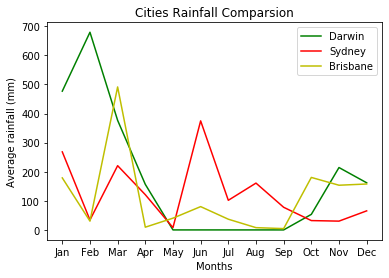

In [17]:
#output a visualized rainfall graph combined with perth and mandurah

import numpy as np

# Add labels and set colours for perth and mandurah
plt.plot(darwin_data_cln,'g-',label='Darwin')
plt.plot(sydney_data_cln,'r-',label='Sydney')
plt.plot(brisbane_data_cln,'y-',label='Brisbane')

#define x and y axis and labels 

months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
plt.xticks(x, months)
plt.title("Cities Rainfall Comparsion")
plt.legend(loc='upper right')
plt.xlabel('Months')
plt.ylabel('Average rainfall (mm)')

#### Based on the finding from the first part, we are going to combine the conclusion and the bar chart from part and make further conclusion for the user to make market decisions.

According to the line chart, different locations have different precipitations among 12 months. Darwin has the highest precipitation in February, while Sydney in June and Brisbane in March.
The company can start launching the new umbrella in December because it comes from the bottom to the peak within 3 months, from 162mm to 679mm. Which shows that the people will need an umbrella while they are outside, once they forget to bring it, it'll have a high chance for them to buy the umbrella because its the most precipitation months for Darwin, the consumer will think that it is worth to buy it.

After selling the new umbrella in Darwin, if the response is good, the company can start reducing umbrellas quantities on shipping to Darwin, because the precipitation is dropping on a straight line from 679mm to 0 mm within 3 months. The company can start shipping the new umbrella to Brisbane from February to April and Sydney from Mid of May to September, which can maximize the company's sales volume and increase company's population within a short period.


# Quick Example - Best newspaper/magazine in USA

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
#import library
import urllib.request

#define get html source coding
def get_HTML(url):
    response = urllib.request.urlopen(url)
    html = response.read()
    return html

### Newspaper's rank

In [33]:
#taking out useful eliminate from a website by using inspect elements
newspaper_ranking = []

#taking out ranking from the website
states_bom_HTML = get_HTML("https://www.infoplease.com/arts-entertainment/newspapers-and-magazines/top-100-newspapers-united-states")
soup = BeautifulSoup(states_bom_HTML, "lxml")
span_element = soup.find(text="Top 100 Newspapers in the United States")
h1_element = span_element.parent
table_element = h1_element.findNext('table')
for tr_element in table_element.findAll('tr'):
    td_element = tr_element.find('td')
    if td_element != None:
        newspaper_ranking.append(td_element.text)

# eliminate useless data and print out 
newspaper_ranking = newspaper_ranking[0:10]
newspaper_ranking

['1.', '2.', '3.', '4.', '5.', '6.', '7.', '8.', '9.', '10.']

### Newspaper's company

In [34]:
#taking out useful eliminate from a website by using inspect elements
company = []

##taking out top 10 ranking newspaper and magazine from the website
states_bom_HTML = get_HTML("https://www.infoplease.com/arts-entertainment/newspapers-and-magazines/top-100-newspapers-united-states")
soup = BeautifulSoup(states_bom_HTML, "lxml")
span_element = soup.find(text="Top 100 Newspapers in the United States")
h1_element = span_element.parent
table_element = h1_element.findNext('table')
for tr_element in table_element.findAll('tr'):
    td_element = tr_element.find('td',attrs={'align':'left'})
    if td_element != None:
        company.append(td_element.text)

# eliminate useless data and print out 
company = company[0:10]
company

['USA Today (Arlington, Va.)',
 'Wall Street Journal (New York, N.Y.)',
 'Times (New York, N.Y.)',
 'Times (Los Angeles)',
 'Post (New York, N.Y.)',
 'Daily News (New York, N.Y.)',
 'Post (Washington, DC)',
 'Tribune (Chicago)',
 'Chronicle (Houston)',
 'Arizona Republic (Phoenix)']

### Newspaper's Circulation

In [35]:
#taking out useful eliminate from a website by using inspect elements
Circulation = []

#taking out circulation for the top 10 newspapers and magazines
states_bom_HTML = get_HTML("https://www.infoplease.com/arts-entertainment/newspapers-and-magazines/top-100-newspapers-united-states")
soup = BeautifulSoup(states_bom_HTML, "lxml")
span_element = soup.find(text="Top 100 Newspapers in the United States")
h1_element = span_element.parent
table_element = h1_element.findNext('table')
for tr_element in table_element.findAll('tr'):
    td_element = tr_element.find('td',attrs={'align':'right'})
    if td_element != None:
        Circulation.append(td_element.text)

# eliminate useless data and print out 
Circulation = Circulation[0].replace(",", ""),Circulation[1].replace(",", ""),Circulation[2].replace(",", ""),Circulation[3].replace(",", ""),Circulation[4].replace(",", ""),Circulation[5].replace(",", ""),Circulation[6].replace(",", ""),Circulation[7].replace(",", ""),Circulation[8].replace(",", ""),Circulation[9].replace(",", "")
Circulation

('2278022',
 '2062312',
 '1120420',
 '815723',
 '724748',
 '718174',
 '699130',
 '566827',
 '503114',
 '433731')

### Combine all useful information

In [36]:
# combine the data from the above and combine it into useful readable data
# rank + newspaper and magazines + circulation

for i in range(0, len(newspaper_ranking)):
    print("Rank: "+newspaper_ranking[i])
    print("Newspaper: "+ company[i])
    print("Circulation: "+ Circulation[i])    
    print('\n')

Rank: 1.
Newspaper: USA Today (Arlington, Va.)
Circulation: 2278022


Rank: 2.
Newspaper: Wall Street Journal (New York, N.Y.)
Circulation: 2062312


Rank: 3.
Newspaper: Times (New York, N.Y.)
Circulation: 1120420


Rank: 4.
Newspaper: Times (Los Angeles)
Circulation: 815723


Rank: 5.
Newspaper: Post (New York, N.Y.)
Circulation: 724748


Rank: 6.
Newspaper: Daily News (New York, N.Y.)
Circulation: 718174


Rank: 7.
Newspaper: Post (Washington, DC)
Circulation: 699130


Rank: 8.
Newspaper: Tribune (Chicago)
Circulation: 566827


Rank: 9.
Newspaper: Chronicle (Houston)
Circulation: 503114


Rank: 10.
Newspaper: Arizona Republic (Phoenix)
Circulation: 433731




### Bar chart of circulation of different companies

Text(0.5, 1.0, 'Circulation of different company')

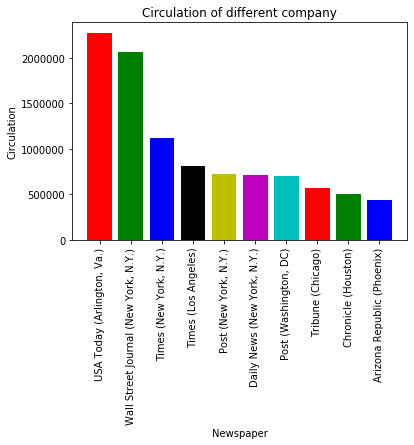

In [37]:
#Import the plotting library
import matplotlib.pyplot as plt
import numpy as np

#a for loop in order to turn all the str from the list into INT and make sure its recognizable for plt
Circulation_new = []
for c in Circulation:
    Circulation_new.append(int(c))

#Setup the data with different colors and names
y = [Circulation_new[0],Circulation_new[1], Circulation_new[2],Circulation_new[3],Circulation_new[4],Circulation_new[5],Circulation_new[6],Circulation_new[7],Circulation_new[8],Circulation_new[9]]
x = [company[0],company[1], company[2],company[3],company[4], company[5],company[6],company[7],company[8],company[9]]
my_colors = 'rgbkymc'


#Plot the data and rotate the x axis name by 90 degrees
plt.bar(x,y, color=my_colors)
plt.xticks(rotation=90)

#Lable the chart
plt.ylabel('Circulation')
plt.xlabel('Newspaper')
plt.title('Circulation of different company')